In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
import sys, os
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "Data/"

In [2]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
#     def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
#                  pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
    def __init__(self, easting, northing, porosity, permeability):
        self.easting = easting ##easting, areas with higher
        self.northing = northing ##northing, areas with higher
        self.porosity = porosity ##porosity, definitely something there
        self.permeability = permeability ##permeability,definitely something there
#         self.PR = PR ##poissons's ratio, might be something. couple of outliers but general convergence
#         self.YM = YM ##young's modulus, pyramid shape, probably something

    def get_easting(self):
        return self.easting
    
    def get_northing(self):
        return self.northing
    
    def get_porosity(self):
        return self.porosity
    
    def get_permeability(self):
        return self.permeability

In [3]:
data_df = pd.read_csv(r'Data/Brisket 1-44H.csv')

In [4]:
data_df.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
0,1900.0,3900.0,0.06,0.014,0.367,3738904.716,0.218974,0.781026,5.0,NaN,NaN
1,1985.0,3900.0,0.05,0.009,0.367,3758088.084,0.219055,0.780945,5.0,NaN,NaN
2,2070.0,3900.0,0.05,0.011,0.367,3777264.393,0.219136,0.780864,5.0,NaN,NaN
3,2156.0,3900.0,0.07,0.014,0.367,3796434.186,0.219217,0.780783,5.0,NaN,NaN
4,2241.0,3900.0,0.07,0.014,0.367,3796434.186,0.219217,0.780783,5.0,NaN,NaN


In [5]:
import glob
wellList=glob.glob("Data/*")
wellList[100:101]

['Data\\well production.csv']

In [6]:
def createWells():
    for i in range (len(wellList)-1):
        wellProduction = pd.read_csv(wellList[i])
        
        for j in range(100):
        ##for every well
            ##get all the data from the well production csv
            easting = wellProduction.at[j, "easting"]
            northing = wellProduction.at[j, "northing"]
            porosity = wellProduction.at[j, "porosity"]
            permeability = wellProduction.at[j, "permeability"]
#             PR = wellProduction.iloc[i, 4:16] ##oil per month
#             YM = wellProduction.iloc[i, 16:28] ##water per month
            ##now that we have the name of the well, we can use that to access its
            ##own csv file and get that data
#             wellDF = pd.read_csv(_PATH + name + ".csv")
#             e = wellDF["easting"]
#             n = wellDF["northing"]
#             p = wellDF["porosity"]
#             perm = wellDF["permeability"]
#             pr = wellDF["Poisson's ratio"]
#             ym = wellDF["Young's Modulus"]
#             ws = wellDF["water saturation"]
#             os = wellDF["oil saturation"]
#             thick = wellDF["thickness (ft)"]
#             prop = wellDF["proppant weight (lbs)"]
#             pump = wellDF["pump rate (cubic feet/min)"]
            ##create a new well
#             temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
            temp = Well(easting, northing, porosity, permeability)
            ##append the new well to the list
            wells.append(temp)

In [7]:
createWells()

In [8]:
wells[200].get_easting()

80100.0

In [9]:
len(wellList)

101

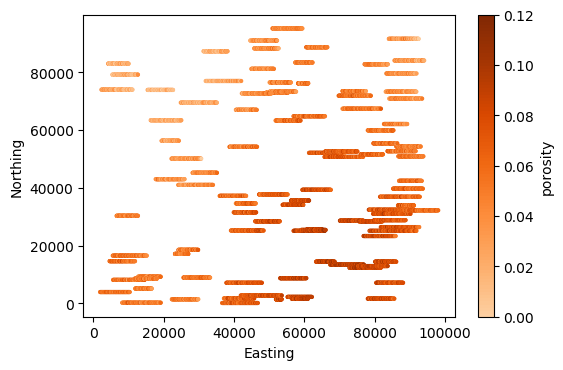

In [10]:
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((bottom(np.linspace(0, 1, 128))))[32:127]
newcmp = ListedColormap(newcolors, name='DarkerOrange')

def makeGraph(xProp, xIsMethod, yProp, yIsMethod, xLabel, yLabel, zProp=-1, zIsMethod=-1, zRepeat=1, zLabel=""):
    #Graph anything
    xCoords = []
    yCoords = []
    zCoords = []
    for well in wells:
        xAttr = getattr(well, xProp)
        yAttr = getattr(well, yProp)
        zAttr = getattr(well, zProp) if zProp is not -1 else -1
        xCoords.append(xAttr() if xIsMethod else xAttr)
        yCoords.append(yAttr() if yIsMethod else yAttr)
        zCoords.append(zAttr() if zIsMethod else zAttr) if zAttr is not -1 else -1
    xCoords = np.array(xCoords).reshape(-1)
    yCoords = np.array(yCoords).reshape(-1)
    zCoords = np.array(zCoords).repeat(zRepeat).reshape(-1)
    plt.figure(dpi=100)
    if zAttr is -1:
        plt.scatter(xCoords, yCoords, s = 4)
    else:
        plt.scatter(xCoords, yCoords, s = 4, c=zCoords, cmap=newcmp)
        plt.colorbar().set_label(zLabel)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="porosity", zIsMethod=False, zLabel="porosity")

In [11]:
# xPos, yPos, zPos = 20, 20, 20;
# Matrix = [[[0 for x in range(xPos)] for y in range(xPos)] for z in range(zPos)]
# for x in range(xPos):
#     for y in range(yPos):
#         for z in range(zPos):
#             Matrix[x][y][z]=2

# print(Matrix[2][2][3])
xPos, yPos, zPos = 10, 10, 10;
Matrix = [[[0 for x in range(xPos)] for y in range(xPos)] for z in range(zPos)]
for x in range(xPos):
    for y in range(yPos):
            int xVal=np.interp(x*10000,eastings,porosity)
            int xVal=np.interp(y*10000,eastings,porosity)
for x in range(xPos):
    for y in range(yPos):
        print(Matrix[x][y])

SyntaxError: invalid syntax (<ipython-input-11-761de787d02d>, line 13)

In [ ]:
eastings=[]
for i in range(len(wells)):
    eastings.append(wells[i].get_easting())
porosity=[]
for i in range(len(wells)):
    porosity.append(wells[i].get_porosity())

# x.sort()
# northings.sort()
print(porosity[200:210])
print(type(eastings))
interpolatedValues=[]
np.interp(12,eastings,porosity)

In [ ]:
res = {} 
for key in eastings: 
    for value in porosity: 
        res[key] = value 
        porosity.remove(value) 
        break  
print(res)
# print ("Resultant dictionary is : " +  str(res)) 

In [ ]:
import collections
sorted_res = collections.OrderedDict(sorted(res.items()))
print("Sorted Keys")
for k, v in sorted_res.items(): print(k, v)

In [ ]:

x=np.array(sorted_res.keys())
# y =np.array(sorted_res.values())
# print(len(x))
# print(len(y))
print(x)
# print(type(x))

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
import matplotlib.pyplot as plt
from scipy import interpolate
# x = np.arange(0, 10)
# y = np.exp(-x/3.0)
x=sorted_res.keys()
y = sorted_res.values()
f = interpolate.interp1d(x, y)
print(y)
xnew = np.arange(0, 10)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
# plt.plot(x, y, 'o', x, f(x))
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [ ]:
# x = np.linspace(0, 10, num=11, endpoint=True)
x =np.array(list(sorted_res.keys()))
y = np.array(list(sorted_res.values()))
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

In [ ]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [ ]:
z=[]
z.append(wells[0].get_easting())
print(z)

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Note that the output interpolated coords will be the same dtype as your input
# data.  If we have an array of ints, and we want floating point precision in
# the output interpolated points, we need to cast the array as floats
###DOMAIN SPACE

data = np.arange(100).reshape((10,10)).astype(np.float)
print(data)

##SPARSE DATA GIVEN DATA 
# I'm writing these as row, column pairs for clarity...
coords = np.array([[1.2, 3.5], [6.7, 2.5], [7.9, 3.5], [3.5, 3.5]])
# However, map_coordinates expects the transpose of this
coords = coords.T
print(coords)
# The "mode" kwarg here just controls how the boundaries are treated
# mode='nearest' is _not_ nearest neighbor interpolation, it just uses the
# value of the nearest cell if the point lies outside the grid.  The default is
# to treat the values outside the grid as zero, which can cause some edge
# effects if you're interpolating points near the edge
# The "order" kwarg controls the order of the splines used. The default is 
# cubic splines, order=3
zi = ndimage.map_coordinates(data, coords, order=3, mode='nearest')

row, column = coords
nrows, ncols = data.shape
im = plt.imshow(data, interpolation='nearest', extent=[0, ncols, nrows, 0])
plt.colorbar(im)
plt.scatter(column, row, c=zi, vmin=data.min(), vmax=data.max())
for r, c, z in zip(row, column, zi):
    plt.annotate('%0.3f' % z, (c,r), xytext=(-10,10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), ha='right')
plt.show()

In [ ]:
xCoords 
yCoords 
zCoords 